# Assignment 3: Logistic Regression 
# FI 8090
## Group 2: Caroline MacMillan, Chris Lee, and Jonghwa Baek

In [1]:
import pandas as pd
import csv
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Part 1

Analyze the data in the $\textbf{CreditCard}$ dataset.

The following variables are included in the dataset:
1. card: was the application for a card accepted? (Binary: 1/0) Response Variable
2. reports: Number of major derogatory reports 
3. income: Yearly income (in USD 10,000)
4. Age: Age in years plus 12ths of a year 
5. Owner: Does the individual own his/her home? 
6. dependents: number of dependents 
7. months: Months living at current address
8. share: ratio of monthly credit card expenditure to yearly income
9. selfemp: Is the individual self-employed?
10. majorcards: number of major credit cards held
11. active: number of active credit accounts
12. expenditure: average monthly credit card expenditure

*Use variables 2 to 8 (as listed above) to determine which of the predictors influence the probability that an application is accepted.*

#### A.	Provide summary stat of the predictors. 

In [2]:
data = pd.read_csv('CreditCard.csv')
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
data.shape

(1319, 12)

In [4]:
data.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [5]:
data_dummied = pd.get_dummies(data, columns = ['card', 'owner', 'selfemp'])
data_dummied.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_no,card_yes,owner_no,owner_yes,selfemp_no,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,0,1,0,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,1,1,0,1,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,0,1,0,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,1,1,0,1,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,0,1,0,1,1,0


In [6]:
data_dummied.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_no,card_yes,owner_no,owner_yes,selfemp_no,selfemp_yes
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967,0.224412,0.775588,0.559515,0.440485,0.931008,0.068992
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812,0.417353,0.417353,0.496634,0.496634,0.253536,0.253536
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### B.	There are some values of variable $\color{red}{\text{age}}$ under one year. Consider data with $\color{red}{\text{age > 18}}$ for your analysis for the rest of the questions. 

In [7]:
data2 = data_dummied[data_dummied['age'] > 18]
data2.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_no,card_yes,owner_no,owner_yes,selfemp_no,selfemp_yes
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.458079,33.387386,3.367257,0.068636,184.970390,0.993902,55.182927,0.817835,6.999238,0.224848,0.775152,0.558689,0.441311,0.930640,0.069360
std,1.348416,9.884200,1.697377,0.094787,272.714742,1.247408,66.254140,0.386127,6.314718,0.417641,0.417641,0.496733,0.496733,0.254162,0.254162
min,0.000000,18.166670,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.237125,0.002208,4.583333,0.000000,12.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,31.291665,2.900000,0.038775,101.231650,1.000000,30.000000,1.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093516,248.970800,2.000000,72.000000,1.000000,11.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data2.shape

(1312, 15)

#### C.	Plot of $\color{red}{\text{income}}$ vs. $\color{red}{\text{reports}}$ (Number of major derogatory reports): mark individuals with card application accepted as blue, and not accepted as red.  

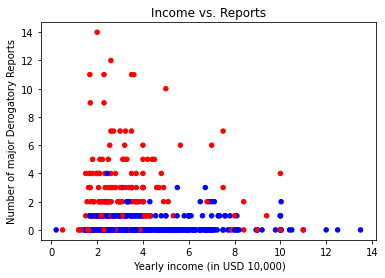

In [9]:
colors = np.where(data2['card_yes'] == 1, 'b', 'r')
data2.plot.scatter(x = 'income', y = 'reports', c = colors)
plt.title('Income vs. Reports')
plt.xlabel(' Yearly income (in USD 10,000)')
plt.ylabel('Number of major Derogatory Reports')
plt.show()

#### D.	Boxplots of  $\color{red}{\text{income}}$ as a function of card acceptance status.  Boxplots of  $\color{red}{\text{reports}}$ as a function of card acceptance status (mark card application accepted as blue, and not accepted as red). (Display two boxplots in same page).  

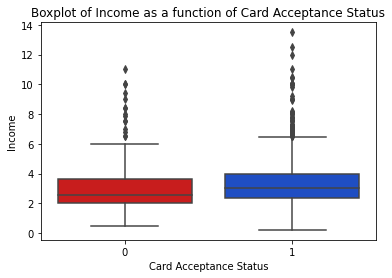

In [10]:
rb = [sns.xkcd_rgb['red'], sns.xkcd_rgb['blue']]
ibp = sns.boxplot(x = 'card_yes', y = 'income', data = data2, palette = rb)
plt.title('Boxplot of Income as a function of Card Acceptance Status')
plt.xlabel('Card Acceptance Status')
plt.ylabel('Income')
plt.show()

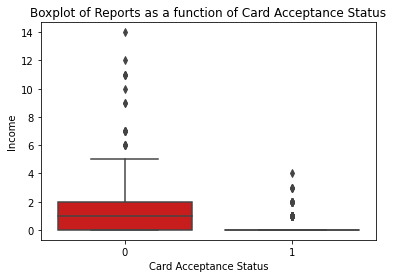

In [11]:
rbp = sns.boxplot(x = 'card_yes', y = 'reports', data = data2, palette = rb)
plt.title('Boxplot of Reports as a function of Card Acceptance Status')
plt.xlabel('Card Acceptance Status')
plt.ylabel('Income')
plt.show()

#### E.	Construct the histogram for the predictors.  
*Note that $\color{red}{\textit{share}}$ is highly right-skewed, so $\color{red}{\textit{log(share)}}$ will be used in the analysis. $\color{red}{\textit{Reports}}$ is also extremely right skewed (most values of reports are 0 or 1, but the maximum value is 14. To reduce the skewness, $\color{red}{\textit{log(reports+1)}}$ will be used for your analysis. Highly skewed predictors have high leverage points and are less likely to be linearly related to the response.*

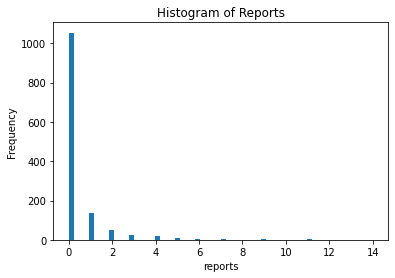

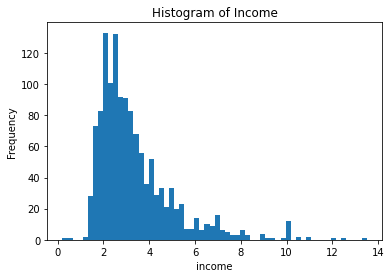

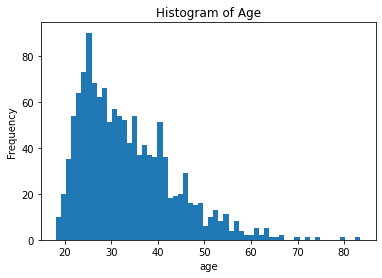

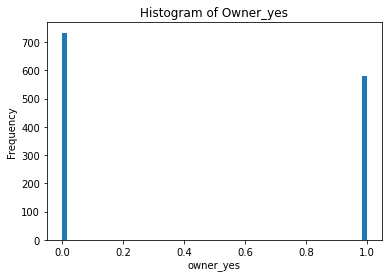

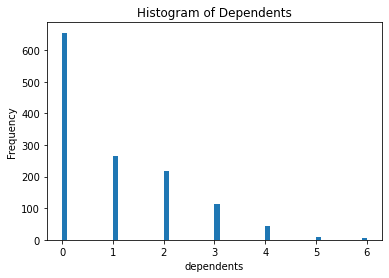

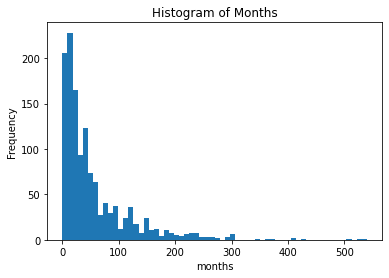

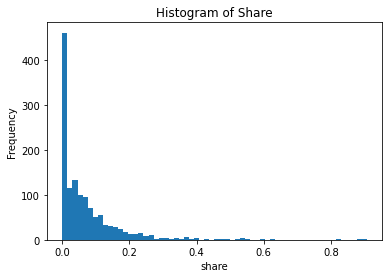

In [12]:
predictors = ['reports', 'income', 'age', 'owner_yes', 'dependents', 'months', 'share']
for p in predictors:
    data2[p].plot.hist(bins = 60)
    plt.title('Histogram of ' + p.capitalize())
    plt.xlabel(p)
    plt.show()

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


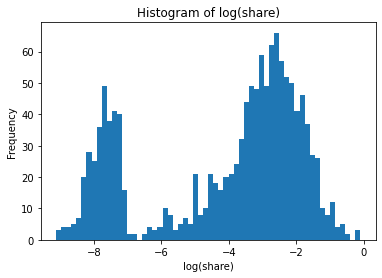

In [13]:
data2['new_share'] = np.log(data2['share'])

np.log(data['share']).plot.hist(bins = 60)
plt.title('Histogram of log(share)')
plt.xlabel('log(share)')
plt.show()

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


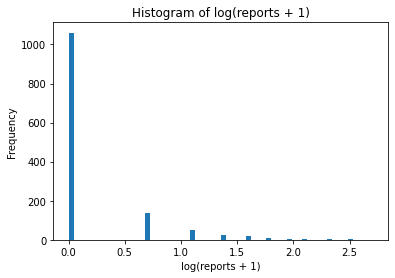

In [14]:
data2['new_report'] = np.log(data2['reports'] + 1)

np.log(data['reports'] + 1).plot.hist(bins = 60)
plt.title('Histogram of log(reports + 1)')
plt.xlabel('log(reports + 1)')
plt.show()

In [15]:
fpredictors = ['new_report', 'income', 'age', 'owner_yes', 'dependents', 'months', 'new_share']

#### F.	Use variables 2 to 8 (as listed above) to determine which of the predictors influence the probability that an application is accepted. Use the summary function to print the results.

In [16]:
X = data2[fpredictors]
X1 = sm.add_constant(X)
y = data2['card_yes'].values.reshape(-1,1)

model = sm.Logit(y, X1).fit()
model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 12


C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1304
Method:                           MLE   Df Model:                            7
Date:                Wed, 28 Oct 2020   Pseudo R-squ.:                     inf
Time:                        16:49:59   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4739      3.674      5.844      0.000      14.272      28.675
new_report    -2.9086      1.098     -2.650      0.008      -5.060      -0.757
income         0.9033      0.190      4.760      0.000       0.531       1.275
age            0.0227      0.022      1.036      0.300      -0.020       0.066
owner_yes      0.7052      0.533      1.323      0.186      -0.340       1.750
dependents    -0.6649      0.267     -2.487      0.013      -1.189      -0.141
months        -0.0057      0.004     -1.435      0.151      -0.014       0.002
new_share      3.4230      0.530      6.452      0.000       2.383       4.463
==============================================================================

Possibly complete quasi-separation: A fraction 0.69 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### G.	To predict whether the application will be accepted or not, convert the predicted probabilities into class labels yes with the following condition: probs > .5 = "yes". Compute the confusion matrix and provide and discuss the following:

$\textbf{a.}$ Overall fraction of correct predictions, Recall, Precision, F-measure, Specificity, FPR and AUC-ROC Curve.


In [17]:
predictions = pd.DataFrame(model.predict(X1), columns = ['Prediction'])
predictions['Label'] = model.predict(X1).apply(lambda x: 'Yes' if x > 0.5 else 'No')
predictions['Label_Boolean'] = model.predict(X1).apply(lambda x: 1 if x > 0.5 else 0)
predictions.head()

,Prediction,Label,Label_Boolean
0,0.999998,Yes,1
1,0.985714,Yes,1
2,0.994763,Yes,1
3,1.000000,Yes,1
4,1.000000,Yes,1


In [18]:
cmatrix = confusion_matrix(y, predictions['Label_Boolean'])
tn, fp, fn, tp = cmatrix[0,0], cmatrix[0,1], cmatrix[1,0], cmatrix[1,1]
cmatrix

array([[293,   2],
       [ 22, 995]], dtype=int64)

In [19]:
# Accuracy
print('Accuracy Score: ' + str('{0:.5f}'.format(metrics.accuracy_score(y, predictions['Label_Boolean']))))
# Recall / Sensitivity / True Positive Rate (TPR)
print('Recall Score: ' + str('{0:.5f}'.format(metrics.recall_score(y, predictions['Label_Boolean'], average = 'binary'))))
# Precision
print('Precision Score: ' + str('{0:.5f}'.format(metrics.precision_score(y, predictions['Label_Boolean'], average = 'binary'))))
# F-Score
print('F-Score: ' + str('{0:.5f}'.format(metrics.f1_score(y, predictions['Label_Boolean'], average='binary'))))
# Specificity / True Negative Rate (TNR)
print('Specificity: ' + str('{0:.5f}'.format(tn / (tn + fp))))
# False Positive Rate (FPR)
print('FPR: ' + str('{0:.5f}'.format(fp / (tn + fp))))
# Logistic ROC AUC
print('Logistic: ROC AUC = %.3f' % (metrics.roc_auc_score(y, predictions['Label_Boolean'])))


Accuracy Score: 0.98171
Recall Score: 0.97837
Precision Score: 0.99799
F-Score: 0.98808
Specificity: 0.99322
FPR: 0.00678
Logistic: ROC AUC = 0.986


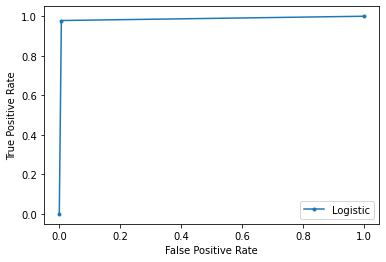

In [20]:
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y, predictions['Label_Boolean'])
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

$\textbf{b.}$ Interpret your findings in G. Provide the summary in the code for this part.  

On the sample of total 1312 observations:

- Overall Accuracy = $\frac{TP + TN}{TP + TN + FP + FN} = \frac{995 + 293}{1312} = $ 98.17%: 

High accuracy.

- TPR (recall) = $\frac{TP}{TP + FN} = \frac{995}{995 + 22} = $ 97.84%:

Out of all actual credit card approval cases, 97.84% were predicted right by the model. Therefore the model is expecting approval cases (card_yes category) as rejected cases (card_no category) 22/1017=2.16% of the time. 2.16% of applications cases may be rejected even if they should have been approved. However, it is concluded that low error rate of 2.16% would be tolerated.

- Precision = $\frac{TP}{TP + FP} = \frac{995}{995 + 2} = $ 99.80%

Out of 997 predicted to be approval cases (card_yes category), 99.8% are actually approved. Only 0.02% of the predicted cases are wrongly classified.

- F-measure = $\frac{2 * 0.9784 * 0.9979}{0.9784 + 0.9979} = $ 98.81%

- Specificity or True Negative Rate (TNR) = $\frac{293}{293 + 2} = $ 99.32%

99.32% of actual rejected cases (card_no category) was projected correctly as rejected cases. Model is able to identify rejected cases fairly accurately.

- FPR = 1 - Specificity = 1 - 0.9932 = $\frac{FP}{TN + FP} = \frac{2}{293 + 2} = $ 0.68%

Low error rate (0.68%). Of the 295 cases that were actually rejected, only 2 were falsely identified as positive. Low percentage of total bad customers who had actual card rejection that were wrongfully identified as good by this model.

Given the purpose of credit card application process that is trying to approve high creditworthiness individuals, low error rate (1-TPR) or false negative of 2.16% among applications that were expected to be rejected, but approved may be minimal and acceptable. Additionally error rate (FPR) of 0.68% with false positive is also pretty low. Overall, it is acceptable to use the model to predict the credit card application trend.

#### H.	Now fit the logistic regression model using a training data (split data randomly). To predict whether the application will be accepted or not, convert the predicted probabilities into class labels yes with the following condition: probs > .5 = "yes". Compute the confusion matrix and provide and discuss the following:

$\textbf{a.}$ Overall fraction of correct predictions, Recall, Precision, F-measure, Specificity, FPR and AUC-ROC Curve. 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .75, random_state = 15)

lr = LogisticRegression()
lr.fit(x_train, y_train)

hpredict = lr.predict(x_test)

hcmatrix = confusion_matrix(y_test, hpredict)
htn, hfp, hfn, htp = hcmatrix[0,0], hcmatrix[0,1], hcmatrix[1,0], hcmatrix[1,1]
hcmatrix

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 75,   3],
       [  8, 242]], dtype=int64)

In [22]:
# Accuracy
print('Accuracy Score: ' + str('{0:.5f}'.format(metrics.accuracy_score(y_test, hpredict))))
# Recall / Sensitivity / True Positive Rate (TPR)
print('Recall Score: ' + str('{0:.5f}'.format(metrics.recall_score(y_test, hpredict, average = 'binary'))))
# Precision
print('Precision Score: ' + str('{0:.5f}'.format(metrics.precision_score(y_test, hpredict, average = 'binary'))))
# F-Score
print('F-Score: ' + str('{0:.5f}'.format(metrics.f1_score(y_test, hpredict, average='binary'))))
# Specificity / True Negative Rate (TNR)
print('Specificity: ' + str('{0:.5f}'.format(htn / (htn + hfp))))
# False Positive Rate (FPR)
print('FPR: ' + str('{0:.5f}'.format(hfp / (htn + hfp))))
# Logistic ROC AUC
print('Logistic: ROC AUC = %.3f' % (metrics.roc_auc_score(y_test, hpredict)))


Accuracy Score: 0.96646
Recall Score: 0.96800
Precision Score: 0.98776
F-Score: 0.97778
Specificity: 0.96154
FPR: 0.03846
Logistic: ROC AUC = 0.965


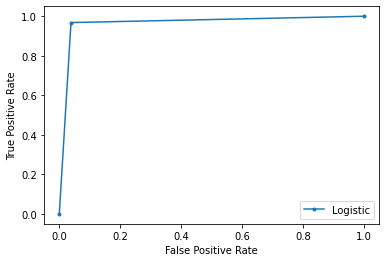

In [23]:
lr_hfpr, lr_htpr, hthresholds = metrics.roc_curve(y_test, hpredict)
plt.plot(lr_hfpr, lr_htpr, marker='.', label = 'Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

$\textbf{b.}$ Interpret your findings in H and compare the results with that of G. Provide the summary in the code for this part.  

We split the data with train/test with proportions 75/25. With this, our train sample is of 984 observations, our test sample is of 328 observations. We ran this model with multiple different random splits and looked at the averaged values, but for interpretation, we stuck with one.

Overall correct prediction decreases slightly from 98.17% (results from G) to 96.65% (results from H). Overall error rate had very slight changes as well. The probability for overall correctedness and error rate did not change too drastically.

False positive increases from 0.68% to 3.8%.

Specificity or True Negative Rate decreases 99.32% from 96.15%

Overall, accuracy and error rate did not change too much compared to the model result in G. True Negative Rate decreased, although by not too much, implies low predicted power of acutal rejected case, which may not be acceptable. From the view of the credit card company, this test result may be satisfactory, however, it is advised to run multiple tests with more feature selection and feature engineering to find a better, more optimal, test model backed by high accuracy and low error rate.